# Классификация

Задача классификации  - определение принадлежности объекта к заданному классу. 

Рассмотрим случай бинарной классификации: есть всего 2 класса. Объекты, которые отностся к первому классу,  пометим меткой y= 1, а ко второму -  y=-1.

Наша задача постороить модель, которая на основе признаков будет предсказывать метку класса.

Попробуем применить модель, которую мы уже рассматривали - линейную. Зададим вектор параметров $\vec{\omega}$. Для каждого примера у нас есть вектор признаков $\vec{x}$. Тогда предсказания мы будем делать на основе выражения $\vec{\omega}\cdot\vec{x}+b$, в дальнейшем для краткости мы будем опускать параметр $b$ и рассматривать выражение  $\vec{\omega}\cdot\vec{x}$.

Можно выбрать различные способы преобразования этого выражения в метки классов. Один из простейших - смотреть на знак выражения:
$$\vec{\omega}\cdot\vec{x}\geq0 \Rightarrow класс\; 1$$
$$\vec{\omega}\cdot\vec{x}<0 \Rightarrow класс\; 2$$
Функция $sign(x)$:
$$sign(x)=\begin{cases}\;\;1,\; при\; x>0 \\\;\;0,\; при\; x=0\\-1,\; при\; x<0\end{cases}$$

Классификатор:
$$class(x)=sign(\vec{\omega}\cdot\vec{x})$$

В случае если у объектов только 2 признака, то у модели будет 3 параметра: $\omega_1$, $\omega_2$ и $b$. Для наглядности давайте первый признак обозначим $x$, а второй $y$. Тогда признаки примеров, которые лежат между классами, описывается выражением:
$$x\cdot \omega_1+y\cdot\omega_2=0$$

Это уравнение задает прямую, которая и будет разделять примеры из разнык классов
(при $\omega_2\ne0$ можем переписать его в виде $y =-x\cdot \omega_1/\omega_2$).

При большем количестве признаков это выражение будет задавать уже плоскость (в трехмерии) или гиперплоскость. 

Просто метки класса часто недостаточно - классификатор может ошибаться, поэтому необходимо знать насколько он "уверен" в своем предсказании. Для этого можно предсказывать вероятность того, что обект принадлежит классу 1. (Если вероятность близка к 0 значит он принадлежит к классу 2).

Вероятность должна лежать в промежутке [0,1], а наше предсказание $\vec{\omega}\cdot\vec{x}$ принимает значения от 0 до $\infty$. Надо придумать как "разумно" перевести $\vec{\omega}\cdot\vec{x}$ в вероятности.

Заметим, что чем дальше лежит пример от разделяющей плоскости тем увереннее в его классе классификатор.
Расстояние от точки $(x_1,y_1)$ до прямой $y =-x\cdot \omega_1/\omega_2$ можно найти по формуле:


$$d=\frac{|\omega_1\cdot x_1+\omega_2\cdot y_1|}{\sqrt{\omega_1^2+\omega_2^2}}$$

При отсутствии модуля в числителе мы как раз получим расстояние до разделяющей прямой с учетом класса. Знаменатель для всех примеров одинаковый, поэтому уверенность как раз зависит от значения выражения $\omega_1\cdot x_1+\omega_2\cdot y_1=\vec{\omega}\cdot\vec{x}$.

Мы хотим чтобы при $\vec{\omega}\cdot\vec{x}\rightarrow -\infty$ вероятность $p(\vec{x}\in 1)\rightarrow 0$ и наоборот: при $\vec{\omega}\cdot\vec{x}\rightarrow \infty$ вероятность $p(\vec{x}\in 1)\rightarrow 1$

Обозначим $p(\vec{x}\in 1)=p_1$ и рассмотрим выражение $OR=\frac{p_1}{1-p_1}$. При $p_1 \in [0,1]$ выражение $OR\in (0, \infty)$. 

Уже лучше, но нам надо   $(-\infty, \infty)$. Возьмем $ln$.

Тогда по свойствам  $ln$ выражение  $ln(OR)\in (-\infty, \infty)$. То, что надо!)

Получили:
$$ln(\frac{p_1}{1-p_1})=\vec{\omega}\cdot\vec{x}$$

Выразим отсюда $p_1$:

$$p_1=\frac{1}{1+exp(-\vec{\omega}\cdot\vec{x})}=sigmoid(\vec{\omega}\cdot\vec{x})$$








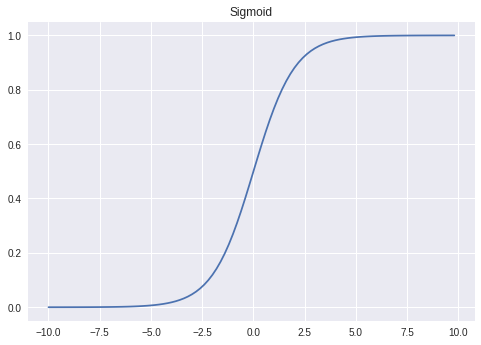

In [4]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(-10,10,0.2)
y = 1/(1+np.exp(-x))

plt.plot(x,y)
plt.title("Sigmoid")
plt.show()

Значения $sigmoid(\vec{\omega}\cdot\vec{x})$ лежат в промежутке (0,1) и обозначают вероятность принадлежности к классу 1.

###Задание №1 (бонусное)
Вывести формулу для $p_1$ из выражения $ln(\frac{p_1}{1-p_1})=\vec{\omega}\cdot\vec{x}$.



Теперь надо записать функцию потерь, для которой мы будем искать минимум для тренировки модели.
Для удобства вычисли вероятность того, что объект $\vec{x}$ принадлежит классу 2:
$$p(\vec{x}\in 2)=p_2=1-p_1=\frac{1}{1+exp(\vec{\omega}\cdot\vec{x})}=sigmoid(-\vec{\omega}\cdot\vec{x})$$

Можно записать формулы $p_1$ и $p_2$ в общем виде:

$$p(\vec{x_i}\in y_i)=\frac{1}{1+exp(-y_i\cdot\vec{\omega}\cdot\vec{x})}=sigmoid(y_i\cdot\vec{\omega}\cdot\vec{x})$$

##Метод максимального правдоподобия
Запишем вероятность того, что классификатор выдаст правильные метки для всех примеров. Так как все объекты у нас независимы, то общая вероятность будет произведением вероятностей:

$$P(X, y, \vec\omega)=p(\vec{x_1}\in y_1)\cdotp(\vec{x_2}\in y_2)\ldots p(\vec{x_n}\in y_n)$$

Мы хотим максимизировать эту вероятность и найти ее соответствующие параметры $\vec{\omega}$.

Для удобства возьмем $ln$ от правой и левой частей. Натуральный логарифм возрастает, потому чем больше значение логарифма, тем больше значение аргумента. Максимум $P$ достигается одновременно с максимумо $ln$. $ln$ произведения - сумма логарифмов.

$$ln(P)=\sum_i ln(p(\vec{x_i}\in y_i))=\sum_i ln(sigmoid(y_i\cdot\vec{\omega}\cdot\vec{x}))=$$
$$=\sum_i ln(\frac{1}{1+exp(-y_i\cdot\vec{\omega}\cdot\vec{x})})=\sum_i -ln(1+exp(-y_i\cdot\vec{\omega}\cdot\vec{x}))$$

Поиск максимума такого выражения соответствует поиску миниму следующего выражения:

$$L(X,y,\vec\omega)=\sum_i ln(1+exp(-y_i\cdot\vec{\omega}\cdot\vec{x}))$$

Это логистическая функция потерь.

$$\vec\omega^*=arg min L(X,y,\vec\omega)$$

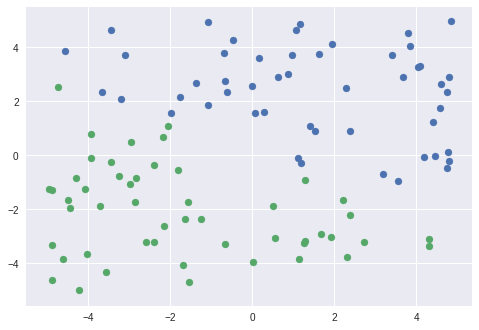

In [40]:
def generate_data_1(a, b, c=0, noise_factor = 1):
    max_range = 10
    noise_factor = 0.01
    n = 100
    
    X = (np.random.random((n,2))-0.5) * max_range 
    
    criterion = X[:, 0] * a + X[:, 1] * b + c
    y = np.ones((n))
    y[criterion < 0] = -1
    
    X = X + (np.random.random((n,2))-0.5) * noise_factor 
    
    return X, y


def plot(X, y):
    x1 = X[y==1, 0]
    y1 = X[y==1, 1]
    x2 = X[y==-1, 0]
    y2 = X[y==-1, 1]
    
    plt.scatter(x1,y1)
    plt.scatter(x2, y2)

    plt.show()

X, y = generate_data_1(3, 5)
plot(X, y)


### Задание №2
1. Сгенерировать свою собственную выборку
2. Разделить на обучающую и тестовую (можно пользоваться кодом из прошлых ноутбуков, не забудьте импортровать нужные библиотеки)
3. Обучить регрессию и сделать предсказания для тестовой выборки
4. Вычислить ошибку найденных коффициентов и исходных, постарайтесь ее объяснить

In [0]:
from sklearn.linear_model import LogisticRegression

# генрируем выборку
X, y = generate_data_1(3, 5)

logistik_regression = LogisticRegression()

X_train, X_test, y_train, y_test = None

logistik_regression.fit(X_train, y_train)
logistik_regression.score(X_test, y_test)

# выводим найденные коффициенты
print('Omegas: \n', logistik_regression.coef_)
print('B: \n', logistik_regression.intercept_)

# вычислите и выведите точность предсказаний для тестовых данных
# можно использовать метод score
score = None

print('Критерий R² (чем ближе к 1, тем точнее): \n',  score   )

# сделать предсказания можно с помощью метода predict
y_test_predict = logistik_regression(X_test)


## Нелинейная граница

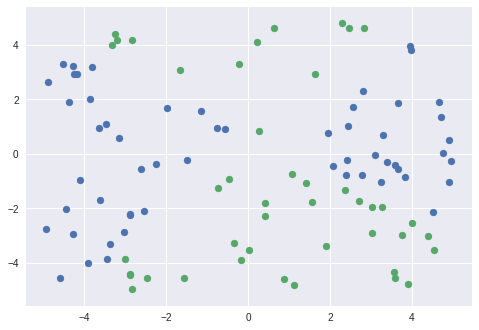

In [36]:
# граница нелинейна
def generate_data_2(a, b, c=1, d=-2, e=3, f=-1, noise_factor = 1):
    max_range = 10
    noise_factor = 0.01
    n = 100
    
    X = (np.random.random((n,2))-0.5) * max_range 
    
    criterion = X[:, 0] ** 2 * a - X[:, 1] **2 * b + X[:, 0] * X[:, 1] *c + X[:, 0] * d + X[:, 1] * e + f
    y = np.ones((n))
    y[criterion < 0] = -1
    
    X = X + (np.random.random((n,2))-0.5) * noise_factor 
    
    return X, y

X2, y2 = generate_data_2(2, 2)
plot(X2, y2)

### Задание №3
1. Добавить необходимые признаки к матрице X. Стоит вспомнить как мы ранее добавляли к нашей матрице стобец с единицами
2. Обучить логистическую регрессию
3. Вывести параметры и объяснить их

In [0]:
# ваш код здесь

### Задание №4 (бонусное)

1. Обучить логистическую регрессию самосоятельно методом градиентного спуска. 
2. Желающие могут получить формулу для градиентов.